# Data Visualization

Visualization is an essential element in data science. It helps to get a first impression of the data and of relations within the data.
It also serves to communicate the results with others.
Actually, good figures are one of the most important factors for a successful publication.

Shown below are economic data from different countries and their [visualization](https://govdna.frontwise.com) won the [World Data Visualization Prize 2019](https://wdvp.worldgovernmentsummit.org/).

<iframe src="https://govdna.frontwise.com/#layout/data/country/" width="100%" height="500">
</iframe>

To communicate information successfully by a graph, the following should be kept in mind:

-   Principle of Proportional Ink: The area occupied by a visualized quantity should be proportional to the value it represents. But keep in mind, that humans can compare lengths better than areas.
-   Make overlapping data visible
-   Pitfalls in color use:
    -   use monotonic color scales
    -   respect colorblindness! (Okabe & Ito, 2008; [color brewer](http://colorbrewer2.org/))
-   Balance between content and context: maximize the data-to-ink ratio appropriately, avoid visual clutter
-   Readable text: font size depends on the visualizing medium (paper, screen, slide)!
-   Avoid line drawings, filled areas are better
-   No 3D figures!

## Matplotlib

The most common visualization package in python is [Matplotlib](https://matplotlib.org/).
There are also excellent alternatives, such as [Plotly](https://plotly.com/) or [Bokeh](https://docs.bokeh.org/en/latest/), and packages that make use of the basic plotting libraries to easily create specialized plots (e.g. [Seaborn](https://seaborn.pydata.org/) or [Holoviews](http://holoviews.org/)), but the discussion here is limited to Matplotlib.

First, we have to import `matplotlib`. Matplotlib offers several APIs for plotting, and the one designed for easy interactive data analysis is `pyplot`.
It is available as a module of the `matplotlib` package.

In [4]:
import matplotlib.pyplot as plt

In [5]:
# we need numpy for creating example data
import numpy as np

### Anatomy of a figure

Lets create our first figure:

```{margin}
All the plotting related functions are within the `matplotlib.pyplot` module which is abbreviated `plt` in the import statement above.
```

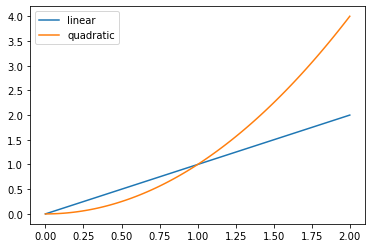

In [6]:
# Prepare the data
x = np.linspace(0, 2, 100)

# Plot the data
plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')

# Add a legend
plt.legend();

In this example, we unconsciously used a lot of built-in default settings, which takes care of all the necessary components to create a meaningful figure. To understand the logic of `matplotlib`, it is necessary to have a look at the anatomy of a figure:

![](http://members.cbio.mines-paristech.fr/~nvaroquaux/tmp/matplotlib/_images/anatomy1.png)
<!-- <center>
<img src='http://members.cbio.mines-paristech.fr/~nvaroquaux/tmp/matplotlib/_images/anatomy1.png' width='70%'/>
<center/> -->

The two most important components are:

-   `Figure`: the whole area (window, page, etc.) on which we plot. It is the basis for all elements on which we will focus on in the following. It is possible to create multiple independent figure instances and a figure can contain multiple objects.
-   `Axes`: the area on which data is plotted with functions like `plot()` or `scatter()`. It may contain coordinate axes with `labels` and `ticks`. One figure can hold multiple axis, so-called subplots.

Additionally to these fundamental components, a wide variety of components can be drawn.
Every axis has a x-axis and a y-axis, which both have ticks (major and minor tick lines and tick labels). There are also axis labels, a title, a legend and a grid to customize the plot. Spines are the lines, which connect the tick lines and separate the plotting area from the rest.

There are two possible ways of managing the content of a figure, the **object oriented** and the **state machine** way.

In [7]:
# create some data
x1, y1 = [1, 2, 3, 4], [10, 20, 25, 30]
x2, y2 = [0.3, 3.8, 1.2, 2.5], [11, 25, 9, 26]

When using the object oriented way, the figure object is created explicitly.
Then we create an axis object for that figure using the `add_subplot` method  of the figure object.
Finally, we can draw graphs on this axis object and customize the plots using methods of the axis object.

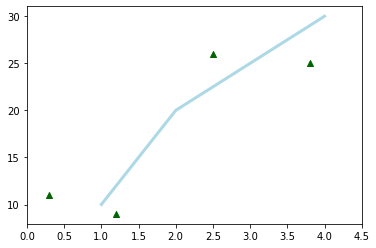

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x1, y1, color='lightblue', linewidth=3)
ax.scatter(x2, y2, color='darkgreen', marker='^')
ax.set_xlim(0.0, 4.5);

With the state machine API, we only use module functions to do the drawing and the customization. By default, a figure object and an axis object is created automatically. If multiple axes are used, the function always act on the last created axis. Hence, the order of the instructions does matter and their meaning depend on the state of the plot. The code below is perfectly equivalent to the example above.

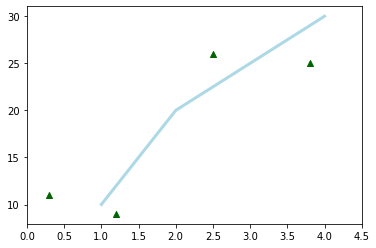

In [9]:
plt.plot(x1, y1, color='lightblue', linewidth=3)
plt.scatter(x2, y2, color='darkgreen', marker='^')
plt.xlim(0.0, 4.5);

As one can see, `plt.xlim` is equivalent to `ax.set_xlim`.
Actually all methods of an axes object are also implemented as functions of the `pyplot` module with a slightly different name (the `set_` is omitted).
Hence, using the state machine interface keeps the code clear for simple plots.
When the figure becomes more complicated, e.g. with many different subplots, it is usually better to use axis objects and the object oriented API.
This produces a better readable and more explicit code.

To get accustomed to the possible options, the best approach is to have a look at the [matplotlib gallery](https://matplotlib.org/gallery.html) and to learn from the given examples.

### Creating a figure and subplots

A figure can be created with `plt.figure`.

```python
plt.figure()
```

However, this figure does not contain any elements to be drawn. To create a plot, an axes object needs to be created first. This can be achieved by `fig.add_subpot()` or `plt.subplot`.

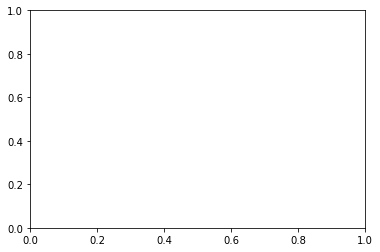

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111);

A subplot is actually an axes object.
With the method `fig.add_subplot(111)`, a new axes object is created on the figure canvas.
The argument `111` means, that the subplots are placed in a 1-by-1 grid and that it is the first axis.

If we want to have three rows of subplots in two columns (so 6 axes in total), we have have to use the following code for the fourth axes object:

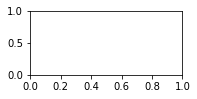

In [16]:
fig = plt.figure()
fig.add_subplot(324)

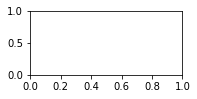

In [18]:
fig = plt.figure()
fig.add_subplot(3, 2, 4)

```{note}
We can only see one axis here, because we only have created one. However, the axis object is scaled appropriately so that all the other axis would fit onto the figure's canvas.
```

It is also possible to create the figure object and all axes with a single command.

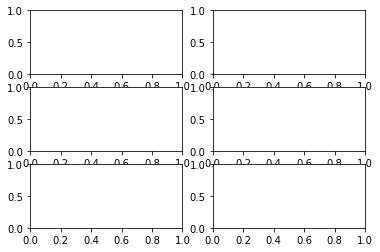

In [19]:
fig, axs = plt.subplots(3, 2)

`axs` is a 2D array, which contains all axes objects.

When we use many subplots on a figure, the axis elements that are located outside of the spines, e.g. axis labels or colorbars, might interfere with neighboring subplots.
This can be fixed by appending the command `plt.tight_layout()` at the end of the plot creation.

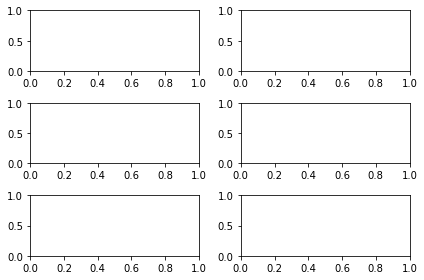

In [20]:
f, a = plt.subplots(3, 2);
plt.tight_layout()

Often, we need a different aspect ratio for the figure. Or the label font size is too small or too large for the medium for which the figure is created.
Then, we want to change the figure size. It can be set with the argument `figsize=(width, height)` when the figure object is created.
The figure size is given in units of inches. Hence, you can change the relative font size of all text on the slide by resizing the figure without changing the aspect ratio.

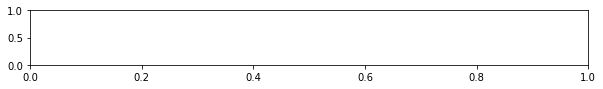

In [21]:
fig = plt.figure(figsize=(10, 1))
fig.add_subplot(111);

### Plotting routines

The actual visualization of data is done by the various plotting methods of the axes object. Here are some examples:

#### 1D data

Methode   |   Description
----------|---------------
[ax.plot()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html) | Line plot
[ax.scatter()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html) | Scatter plot
[ax.bar()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html)  | Vertical rectangles
[ax.barh()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.barh.html) | Horizontal rectangles
[ax.axhline()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axhline.html) | Horizontal line across axes
[ax.axvline()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axvline.html) | Vertical line across axes
[ax.fill()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.fill.html) | Filled polygons
[ax.fill_between()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.fill_between.html) | Fill between y-values and 0
[ax.stackplot()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.stackplot.html) | Stack plot

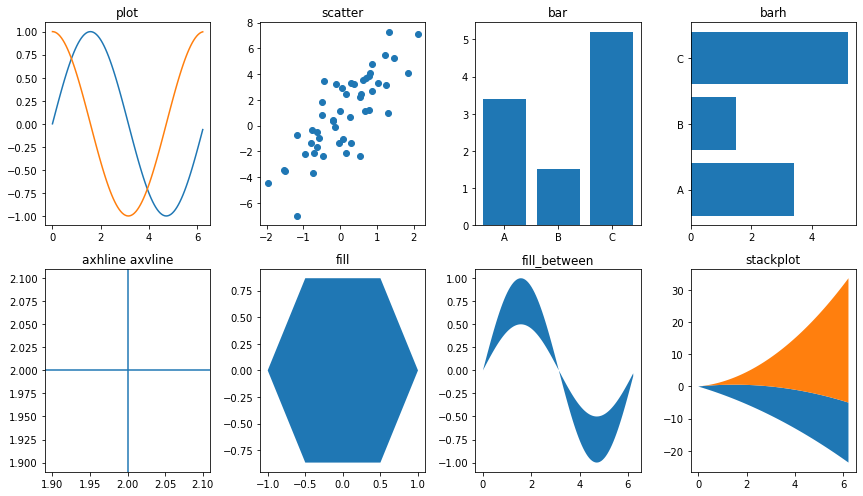

In [22]:
plt.figure(figsize=(12, 7))

plt.subplot(241)
x = 2*np.pi * np.arange(0, 1., .01)
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))
plt.title("plot")

plt.subplot(242)
x = np.random.randn(50)
y = 3 * x + 1 + 2. * np.random.randn(len(x))
plt.scatter(x, y)
plt.title("scatter")

plt.subplot(243)
plt.bar([1, 2, 3], [3.4, 1.5, 5.2], tick_label=["A", "B", "C"])
plt.title("bar")

plt.subplot(244)
plt.barh([1, 2, 3], [3.4, 1.5, 5.2], tick_label=["A", "B", "C"])
plt.title("barh")

plt.subplot(245)
plt.axhline(2)
plt.axvline(2.0)
plt.title('axhline axvline')

plt.subplot(246)
x = np.cos(2*np.pi * np.arange(0, 1., 1 / 6.))
y = np.sin(2*np.pi * np.arange(0, 1., 1 / 6.))
plt.fill(x, y)
plt.title('fill')

plt.subplot(247)
x = 2*np.pi * np.arange(0, 1., .01)
plt.fill_between(x, np.sin(x), .5 * np.sin(x))
plt.title("fill_between")

plt.subplot(248)
x = 2 * np.pi * np.arange(0, 1., .01)
plt.stackplot(x, 3 * x, x**2, baseline='wiggle')
plt.title("stackplot")

plt.tight_layout()

#### 2D data

Methode   |   Description
----------|---------------
[ax.pcolormesh()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.pcolormesh.html) | Pseudocolor plot
[ax.contour()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contour.html) | contour plot
[ax.contourf()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contourf.html) | Filled contour plot
[ax.imshow()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html) | Show image

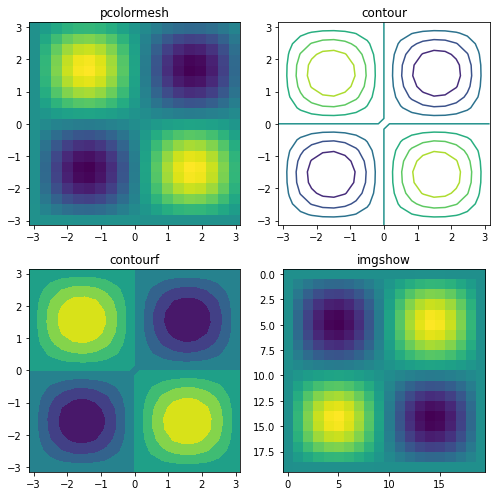

In [23]:
x = np.linspace(-np.pi, np.pi, 20)
y = np.linspace(-np.pi, np.pi, 20)
c = np.sin(x) * np.cos(y + np.pi / 2)[:, np.newaxis]

plt.figure(figsize=(7, 7))

plt.subplot(221); plt.pcolormesh(x, y, c); plt.title('pcolormesh')
plt.subplot(222); plt.contour(x, y, c); plt.title('contour')
plt.subplot(223); plt.contourf(x, y, c); plt.title('contourf')
plt.subplot(224); plt.imshow(c); plt.title('imgshow');

plt.tight_layout()

#### Distributions and vector data

Methode   | Description
----------|-------------
[ax.arrow()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.arrow.html) | Arrow
[ax.quiver()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html) | 2D field of arrows
[ax.streamplot()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.streamplot.html) | 2D vector fields
[ax.hist()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) | Histogram
[ax.boxplot()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html) | Boxplot
[ax.violinplot()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.violinplot.html) | Violinplot

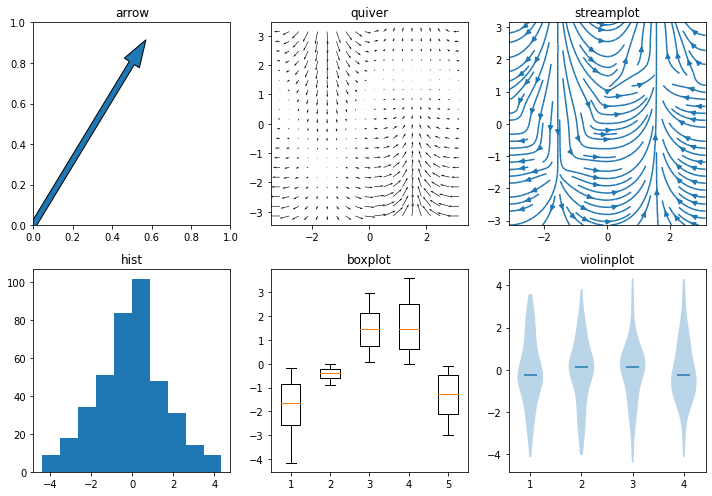

In [24]:
x = np.linspace(-np.pi, np.pi, 20)
y = np.linspace(-np.pi, np.pi, 20)
u = np.cos(x) * np.abs(y[:, np.newaxis] - np.pi / 2 * np.sin(x) - 1)
v = np.sin(x) * np.abs(y[:, np.newaxis] - np.pi / 2 * np.sin(x))

plt.figure(figsize=(10, 7))

plt.subplot(2, 3, 1); plt.arrow(0, 0, .5, .8, width=.03); plt.title('arrow')
plt.subplot(2, 3, 2); plt.quiver(x, y, u, v); plt.title('quiver')
plt.subplot(2, 3, 3); plt.streamplot(x, y, u, v); plt.title('streamplot')
plt.subplot(2, 3, 4); plt.hist(u.flatten()); plt.title('hist')
plt.subplot(2, 3, 5); plt.boxplot(u[:, ::4]); plt.title('boxplot')
plt.subplot(2, 3, 6); plt.violinplot(u.reshape(-1, 4), showextrema=False, showmedians=True); plt.title('violinplot');

plt.tight_layout();

#### Maps

We need an additional package to plot proper map projections. [Cartopy](https://scitools.org.uk/cartopy/docs/latest/) is suggested. We have to choose a [map projection](https://en.wikipedia.org/wiki/Map_projection) which defines how the 3D surface of the Earth is projected onto a 2D surface for plotting. The projection used below is the [Mollweide](https://scitools.org.uk/cartopy/docs/latest/crs/projections.html#mollweide) projection.

In [27]:
def sample_data(shape=(73, 145)):
    """Return ``lons``, ``lats`` and ``data`` of some fake data."""
    nlats, nlons = shape
    lats = np.linspace(-np.pi / 2, np.pi / 2, nlats)
    lons = np.linspace(0, 2 * np.pi, nlons)
    lons, lats = np.meshgrid(lons, lats)
    wave = 0.75 * (np.sin(2 * lats) ** 8) * np.cos(4 * lons)
    mean = 0.5 * np.cos(2 * lats) * ((np.sin(2 * lats)) ** 2 + 2)

    lats = np.rad2deg(lats)
    lons = np.rad2deg(lons)
    data = wave + mean

    return lons, lats, data

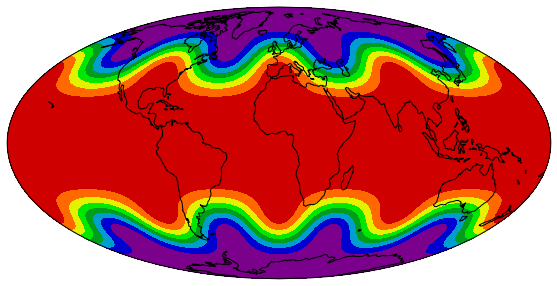

In [28]:
import cartopy.crs as ccrs


fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mollweide())

lons, lats, data = sample_data()

ax.contourf(lons, lats, data,
            transform=ccrs.PlateCarree(),
            cmap='nipy_spectral')
ax.coastlines()
ax.set_global()

By passing a projection object from the `cartopy.crs` module as the `projection` argument in the `fig.add_subplot` call, the projection of the map plot is set.
However, we also have to specify in which coordinate system the coordinates of our data are defined to enable cartopy to transform between different coordinate systems.
This is done by passing a projection object as the `transform` argument in the plotting call. By knowing the correct transform for our data, we can choose any map projection we like.

Of course these are not all functions. Have a look in the [matplotlib gallery](https://matplotlib.org/gallery.html) for more examples.

### Customize figures

To obtain a meaningful and acceptable figure, further information such as axis labels, subplot titles or possible annotations (to emphasize certain aspects of the figure) have to be added. All subplot specific settings are implemented as a property of the axes object and can be set with `ax.set()`. Here is an incomplete list of available properties.

Property | Type | Description
---------|------|----------
alpha |float| Transparence, between 0 und 1
aspect |{'auto', 'equal'} or num| Ratio of the axis scales
facecolor |color| Background color
frame_on |bool| Frame around the data section
position |[left, bottom, width, height] or Bbox| Position of the axis in the figure
rasterized |bool or None| Forces bitmap output for vector graphic formats
title |str| Title of the subplots
xlabel |str| Lable of the x-axis
xlim |(left: float, right: float)| Data range of the x-axis
xscale |{"linear", "log", "symlog", "logit", ...}| Scaling of the x-axis
xticklabels |List[str]| Tick labels
xticks |list| Position of the ticks
ylabel |str| Lable of the y-axis
ylim |(bottom: float, top: float)| Data range of the y-xis
yscale |{"linear", "log", "symlog", "logit", ...}| Scaling of the y-axis
yticklabels |List[str]| Tick labels
yticks |list| Position of the ticks

Those attributes can be set via `ax.set()` or e.g. via `ax.set_xlabel()` or `plt.xlabel()`. All lines below are equivalent.

```python
ax.set(xlabel="x axis label")
ax.set_xlabel("x axis label")
plt.xlabel("x axis label")
```

### Saving figures

To use the figure in a talk or a publication, it needs to be saved first. Therefore matplotlib offers the command `plt.savefig()` or the `savefig` method of the figure object. The filename is given as an argument. The suffix determines the file format, e.g. `png`, `jpg` or `svg`. The latter is a format for vector graphics. When a bitmap is created, the argument `dpi` can be added.

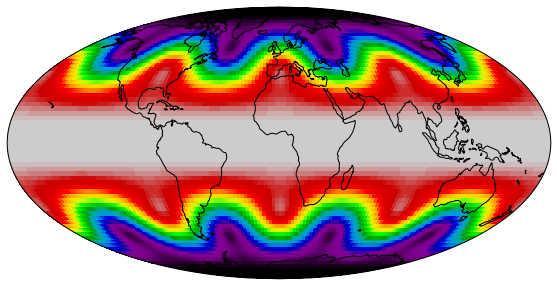

In [29]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mollweide())

lons, lats, data = sample_data()

ax.pcolormesh(lons, lats, data,
            transform=ccrs.PlateCarree(),
            cmap='nipy_spectral',
            rasterized=True
)
ax.coastlines()
ax.set_global()

fig.savefig('for_web.png', dpi=72)
fig.savefig('for_publication.png', dpi=300)
fig.savefig('vector.svg')

```{admonition} Figures for publications
In general it is advisable to produce vector graphics for publications or presentations. Unfortunately they can get very big if the visualization of the data has a lot of structure, i.e. consists of many objects. This can be the case for scatter plots with many data points or pcolormesh plots of large arrays. The consequences are huge figure files and slow to render figures. If you plot data of considerable size you should pass the argument `rasterized=True` in the plotting command, e.g. `ax.scatter()` or `ax.pcolormesh()`. Labels and titles remain vector graphics while the graphical representation of the data itself will be rendered as a bitmap and embedded into the vector graphic. This saves a lot of memory, disk space and ensures that the final figure can be displayed smoothly. The resolution of the embedded bitmap can be specified by the `dpi` argument in the `savefig` call. 
```